<a href="https://colab.research.google.com/github/bioai96/SKTFLYAI/blob/main/DL/%EB%8B%A4%EC%9D%B4%EC%95%84%EB%AA%AC%EB%93%9C_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다이아몬드 가격 예측하기 (박주언, 임단비)
### 데이터 출처(캐글): https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 데이터 가져오기

In [ ]:
df = pd.read_csv('./data/Diamonds Prices2022.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


## 데이터 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028234,0.181602,0.921591,0.975093,0.951721,0.953387
depth,0.028234,1.000000,-0.295798,-0.010630,-0.025289,-0.029340,0.094927
table,0.181602,-0.295798,1.000000,0.127118,0.195333,0.183750,0.150915
price,0.921591,-0.010630,0.127118,1.000000,0.884433,0.865419,0.861249
x,0.975093,-0.025289,0.195333,0.884433,1.000000,0.974701,0.970771
y,0.951721,-0.029340,0.183750,0.865419,0.974701,1.000000,0.952005
z,0.953387,0.094927,0.150915,0.861249,0.970771,0.952005,1.000000


## 시각화

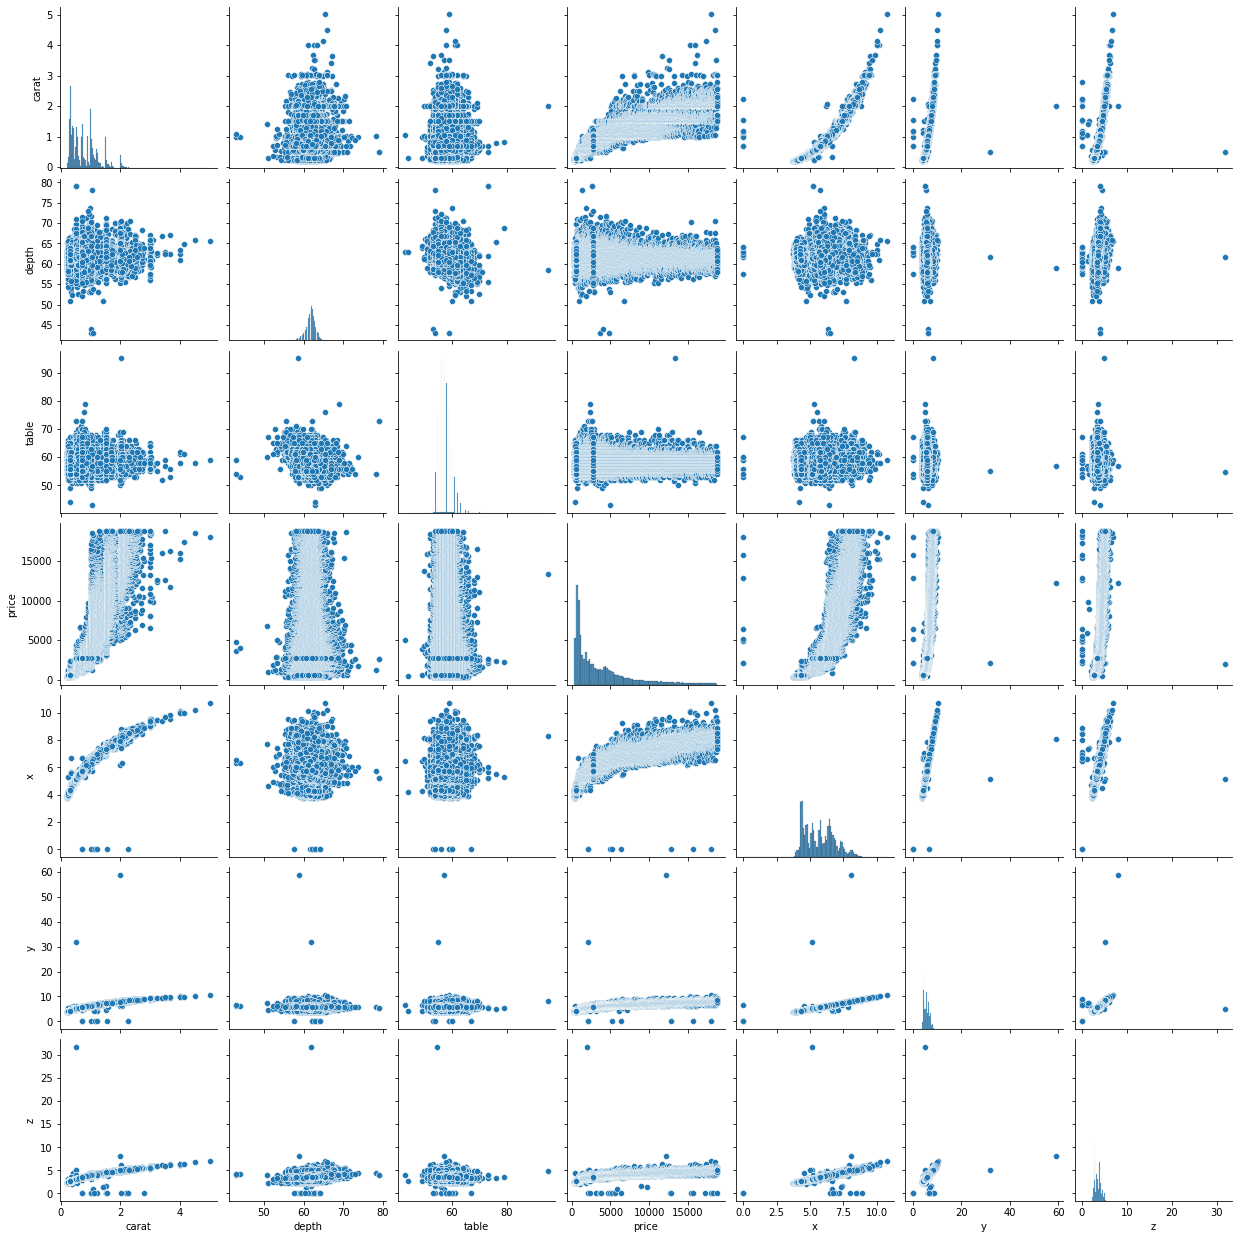

In [ ]:
sns.pairplot(df)
plt.show()

## One hot Encoding

In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
df = pd.get_dummies(df, drop_first = True)
df

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0
53939,0.75,62.2,55.0,2757,5.83,5.87,3.64,0,1,0,...,0,0,0,0,0,1,0,0,0,0
53940,0.71,60.5,55.0,2756,5.79,5.74,3.49,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53941,0.71,59.8,62.0,2756,5.74,5.73,3.43,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## 데이터 분리

In [ ]:
y = df['price']
X = df.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

## 모델링

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=23, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                768       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


2022-08-03 17:10:05.646941: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
early_stopping_callbacks = EarlyStopping(monitor='val_loss', patience=20)
model.compile(optimizer='adam', loss='mean_squared_error') # mean_squared_logarithmic_error
model.fit(X, y, validation_split=0.25, epochs=500, batch_size=256, callbacks=[early_stopping_callbacks])

Epoch 1/500
159/159 [==============================] - 1s 2ms/step - loss: 32173172.0000 - val_loss: 9276642.0000
Epoch 2/500
159/159 [==============================] - 0s 2ms/step - loss: 17873348.0000 - val_loss: 8800155.0000
Epoch 3/500
159/159 [==============================] - 0s 1ms/step - loss: 16662604.0000 - val_loss: 7477106.0000
Epoch 4/500
159/159 [==============================] - 0s 1ms/step - loss: 12650941.0000 - val_loss: 4589696.0000
Epoch 5/500
159/159 [==============================] - 0s 1ms/step - loss: 5893178.0000 - val_loss: 2155688.0000
Epoch 6/500
159/159 [==============================] - 0s 1ms/step - loss: 3431179.0000 - val_loss: 735131.2500
Epoch 7/500
159/159 [==============================] - 0s 1ms/step - loss: 2587396.0000 - val_loss: 487512.6250
Epoch 8/500
159/159 [==============================] - 0s 1ms/step - loss: 2103658.0000 - val_loss: 518830.9375
Epoch 9/500
159/159 [==============================] - 0s 1ms/step - loss: 1830272.8750 - val_l

Epoch 74/500
159/159 [==============================] - 0s 1ms/step - loss: 702082.1875 - val_loss: 275744.3125
Epoch 75/500
159/159 [==============================] - 0s 1ms/step - loss: 703874.6875 - val_loss: 237479.4219
Epoch 76/500
159/159 [==============================] - 0s 2ms/step - loss: 692752.5000 - val_loss: 230167.7344
Epoch 77/500
159/159 [==============================] - 0s 1ms/step - loss: 689502.2500 - val_loss: 224039.6719
Epoch 78/500
159/159 [==============================] - 0s 1ms/step - loss: 692087.3750 - val_loss: 349137.1562
Epoch 79/500
159/159 [==============================] - 0s 1ms/step - loss: 684470.5625 - val_loss: 222876.3438
Epoch 80/500
159/159 [==============================] - 0s 1ms/step - loss: 676102.0625 - val_loss: 220970.6719
Epoch 81/500
159/159 [==============================] - 0s 1ms/step - loss: 676200.0625 - val_loss: 219506.2031
Epoch 82/500
159/159 [==============================] - 0s 1ms/step - loss: 676705.1250 - val_loss: 2171

159/159 [==============================] - 0s 1ms/step - loss: 565230.0000 - val_loss: 166240.1406
Epoch 147/500
159/159 [==============================] - 0s 1ms/step - loss: 562910.6250 - val_loss: 177016.6094
Epoch 148/500
159/159 [==============================] - 0s 1ms/step - loss: 555665.2500 - val_loss: 173636.7031
Epoch 149/500
159/159 [==============================] - 0s 1ms/step - loss: 555727.9375 - val_loss: 175346.9375
Epoch 150/500
159/159 [==============================] - 0s 2ms/step - loss: 553537.0000 - val_loss: 174604.0938
Epoch 151/500
159/159 [==============================] - 0s 1ms/step - loss: 555792.3125 - val_loss: 189915.5781
Epoch 152/500
159/159 [==============================] - 0s 2ms/step - loss: 555362.7500 - val_loss: 207192.3125
Epoch 153/500
159/159 [==============================] - 0s 1ms/step - loss: 550023.8125 - val_loss: 200937.2969
Epoch 154/500
159/159 [==============================] - 0s 1ms/step - loss: 547061.5000 - val_loss: 191322.00

159/159 [==============================] - 0s 1ms/step - loss: 502017.6562 - val_loss: 146987.7500
Epoch 219/500
159/159 [==============================] - 0s 1ms/step - loss: 503118.2188 - val_loss: 207242.7188
Epoch 220/500
159/159 [==============================] - 0s 1ms/step - loss: 500566.4062 - val_loss: 167595.9844
Epoch 221/500
159/159 [==============================] - 0s 1ms/step - loss: 495355.3125 - val_loss: 149912.7969
Epoch 222/500
159/159 [==============================] - 0s 1ms/step - loss: 499245.5312 - val_loss: 145667.8594
Epoch 223/500
159/159 [==============================] - 0s 1ms/step - loss: 490187.2188 - val_loss: 165953.6406
Epoch 224/500
159/159 [==============================] - 0s 1ms/step - loss: 493220.1250 - val_loss: 190969.4062
Epoch 225/500
159/159 [==============================] - 0s 1ms/step - loss: 508473.5000 - val_loss: 162012.6875
Epoch 226/500
159/159 [==============================] - 0s 1ms/step - loss: 490711.4062 - val_loss: 203391.75

## 실제 가격과 예측한 가격 비교

In [ ]:
real_prices = []
pred_prices = []
X_num = []

n_iter = 0
y_pred = model.predict(X_test).flatten()
for i in range(25):
    real = y_test.iloc[i]
    prediction = y_pred[i]
    print("실제 가격: {:.2f} | 예상 가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter+=1
    X_num.append(n_iter)

338/338 [==============================] - 0s 594us/step
실제 가격: 696.00 | 예상 가격: 817.00
실제 가격: 4869.00 | 예상 가격: 5445.51
실제 가격: 15818.00 | 예상 가격: 15737.67
실제 가격: 842.00 | 예상 가격: 899.52
실제 가격: 5759.00 | 예상 가격: 5883.46
실제 가격: 2051.00 | 예상 가격: 2043.11
실제 가격: 513.00 | 예상 가격: 593.67
실제 가격: 2771.00 | 예상 가격: 3155.26
실제 가격: 625.00 | 예상 가격: 712.41
실제 가격: 530.00 | 예상 가격: 649.22
실제 가격: 2818.00 | 예상 가격: 3131.38
실제 가격: 13786.00 | 예상 가격: 15782.67
실제 가격: 1410.00 | 예상 가격: 1718.50
실제 가격: 9065.00 | 예상 가격: 8559.92
실제 가격: 15046.00 | 예상 가격: 15821.75
실제 가격: 5967.00 | 예상 가격: 5449.82
실제 가격: 883.00 | 예상 가격: 893.16
실제 가격: 1262.00 | 예상 가격: 1193.51
실제 가격: 5345.00 | 예상 가격: 5079.22
실제 가격: 872.00 | 예상 가격: 782.63
실제 가격: 1632.00 | 예상 가격: 1861.87
실제 가격: 2304.00 | 예상 가격: 2596.68
실제 가격: 572.00 | 예상 가격: 446.65
실제 가격: 781.00 | 예상 가격: 805.58
실제 가격: 4186.00 | 예상 가격: 4940.12


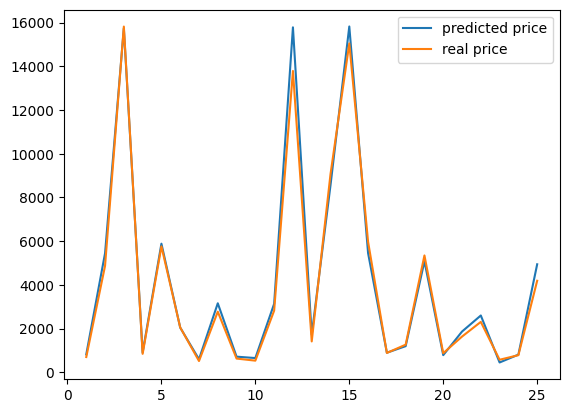

In [ ]:
plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()